In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import math

2024-06-11 16:53:36.280144: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 16:53:39.175192: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 16:53:39.175227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 16:53:39.183298: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-11 16:53:40.402023: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 16:53:40.405359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-06-11 16:54:06.288219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 16:54:06.288934: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
weight = np.ones((1, 1), dtype='float32')
bias = np.zeros(1, dtype='float32')

model.set_weights([weight, bias])
print(model.get_weights())

[array([[1.]], dtype=float32), array([0.], dtype=float32)]


4/4 [==============================] - 0s 3ms/step


Text(0, 0.5, 'debug net output')

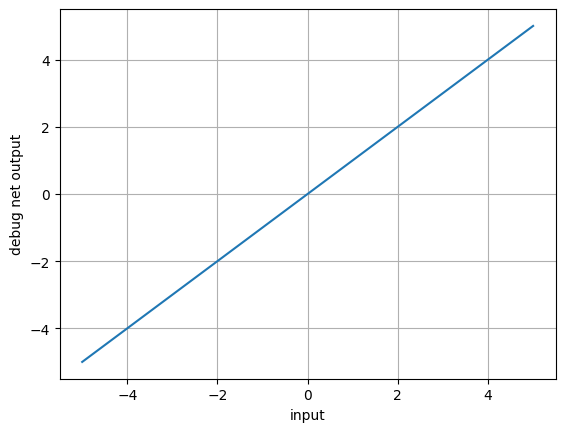

In [5]:
input = np.linspace(-5, 5, 100)
output = model.predict(input)
plt.plot(input, output)
plt.grid()
plt.xlabel('input')
plt.ylabel('debug net output')


In [6]:
debug_model_name = 'debug_model'

model.save(f'{debug_model_name}.keras')

## NO quanitization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(f'{debug_model_name}_no_quant.tflite', 'wb').write(tflite_model)

## Dynamic range quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_dyn_quant = converter.convert()
open(f'{debug_model_name}_dyn_quant.tflite', 'wb').write(tflite_model_dyn_quant)

## Float fallback quantization
x_values = np.random.uniform(low=0, high=2 * math.pi,
                             size=1000).astype(np.float32)
np.random.shuffle(x_values)
def representative_dataset():
    for x_value in x_values:
        yield [x_value.reshape(1, 1)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
tflite_model_fb_quant = converter.convert()
open(f'{debug_model_name}_fb_quant.tflite', 'wb').write(tflite_model_fb_quant)

## Full integer quanitzation
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
converter.representative_dataset = representative_dataset
tflite_model_full_quant = converter.convert()
open(f'{debug_model_name}_full_quant.tflite', 'wb').write(tflite_model_full_quant)

INFO:tensorflow:Assets written to: /tmp/tmphv4h1567/assets


INFO:tensorflow:Assets written to: /tmp/tmphv4h1567/assets


INFO:tensorflow:Assets written to: /tmp/tmpzoq3ciuh/assets


2024-06-11 16:54:09.425957: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-06-11 16:54:09.426025: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-06-11 16:54:09.430641: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmphv4h1567
2024-06-11 16:54:09.431065: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-11 16:54:09.431081: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmphv4h1567
2024-06-11 16:54:09.432613: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2024-06-11 16:54:09.432933: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-06-11 16:54:09.454704: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmphv4h1567
2024-06

INFO:tensorflow:Assets written to: /tmp/tmplbo9lqf7/assets


2024-06-11 16:54:10.737733: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-06-11 16:54:10.737782: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-06-11 16:54:10.738138: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpzoq3ciuh
2024-06-11 16:54:10.738506: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-11 16:54:10.738517: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpzoq3ciuh
2024-06-11 16:54:10.739399: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-06-11 16:54:10.750091: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpzoq3ciuh
2024-06-11 16:54:10.756187: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { serve }; Status: success: OK. Took 18051 m

INFO:tensorflow:Assets written to: /tmp/tmpnv1irek3/assets


INFO:tensorflow:Assets written to: /tmp/tmpnv1irek3/assets
/home/gergo/.local/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:947: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-06-11 16:54:11.515547: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-06-11 16:54:11.515592: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-06-11 16:54:11.515767: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpnv1irek3
2024-06-11 16:54:11.516192: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-11 16:54:11.516205: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpnv1irek3
2024-06-11 16:54:11.517104: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-06-11 16:54:11.528

1104

In [7]:
def write_tflite_model_to_file(debug_model_name, model_name_postfix):
    cmd = f"xxd -i {debug_model_name}{model_name_postfix}.tflite"
    compl = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE)
    model_c_arr = compl.stdout.decode(encoding='ascii')
    with open(f'{debug_model_name}{model_name_postfix}.h', 'w') as header:
        header.write(f'#ifndef {debug_model_name.upper()}{model_name_postfix.upper()}_H\r\n')
        header.write(f'#define {debug_model_name.upper()}{model_name_postfix.upper()}_H\r\n')
        header.write('\r\n')
        header.write(model_c_arr)
        header.write('\r\n')
        header.write(f'#endif // {debug_model_name.upper()}{model_name_postfix.upper()}_H\r\n')

write_tflite_model_to_file(debug_model_name, '_no_quant')
write_tflite_model_to_file(debug_model_name, '_dyn_quant')
write_tflite_model_to_file(debug_model_name, '_fb_quant')
write_tflite_model_to_file(debug_model_name, '_full_quant')

In [12]:
# Initialize the interpreter
model_name_postfix =  '_fb_quant' # '_full_quant', '_no_quant', '_dyn_quant'
interpreter = tf.lite.Interpreter(model_path=f'{debug_model_name}{model_name_postfix}.tflite')
interpreter.allocate_tensors()

tensor_details = interpreter.get_tensor_details()
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

for detail in tensor_details:
    print(detail['name'])
    print('\t', detail['shape'])
    print('\t', detail['dtype'])
    print('\t', detail['quantization_parameters'])

# predictions = np.zeros((len(test_image_indices),), dtype=int)
# for i, test_image_index in enumerate(test_image_indices):
# test_image = test_images[test_image_index]

# # Check if the input type is quantized, then rescale input data to uint8
# if input_details['dtype'] == np.uint8:
#     input_scale, input_zero_point = input_details["quantization"]
#     test_image = test_image / input_scale + input_zero_point

# test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
# interpreter.set_tensor(input_details["index"], test_image)
# interpreter.invoke()
# output = interpreter.get_tensor(output_details["index"])[0]


serving_default_dense_input:0
	 [1 1]
	 <class 'numpy.float32'>
	 {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}
sequential/dense/MatMul1
	 [1 1]
	 <class 'numpy.int8'>
	 {'scales': array([0.00787402], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}
tfl.quantize
	 [1 1]
	 <class 'numpy.int8'>
	 {'scales': array([0.02461355], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}
StatefulPartitionedCall:01
	 [1 1]
	 <class 'numpy.int8'>
	 {'scales': array([0.02461355], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}
StatefulPartitionedCall:0
	 [1 1]
	 <class 'numpy.float32'>
	 {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}
